In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
trans_2021 = pd.read_csv('transaction 2021.csv')
trans_2022 = pd.read_csv('transaction 2022.csv')
trans_2023 = pd.read_csv('transaction 2023.csv')
df_member = pd.read_csv('data member.csv')

In [133]:
trans_2021.head()

,payment_date,ent,center,product_json,total_amount,discount,paid_amount,trans_origin_type
0,2021-01-01 00:00:00.000,TCC43RQQZ3B,TKC4CJ,"[{""product"":""1ECZ"",""qty"":1},{""product"":""8CEC4Q...",1627000.0,0.0,0,online
1,2021-01-01 00:00:00.000,TCC4Q4JZ4Q0,TKCEWQ,"[{""product"":""4E4W"",""qty"":2},{""product"":""DC4CC4...",594000.0,0.0,0,online
2,2021-01-01 00:00:00.000,TCC4RJ11QE7,TKC14E,"[{""product"":""IC4CC4"",""qty"":1}]",468000.0,0.0,0,online
3,2021-01-01 00:00:00.000,TCC434QRCJY,TKC14R,"[{""product"":""5C4CC4"",""qty"":1}]",341000.0,0.0,0,online
4,2021-01-01 00:00:00.000,TCC43RRCE10,TKC11Z,"[{""product"":""5C4C4Q"",""qty"":1}]",189000.0,0.0,0,online


In [134]:
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 22.5+ MB


In [135]:
df_member['year'] = 2023-df_member['join_year']
df_member.tail()

,ent,original_status,join_month,join_year,sponsor,year
590560,H3CCC43B,A,7,2010,H3CCC4R2,13
590561,H3CCC4ZY,A,6,2010,H3CCC4JP,13
590562,H3CCCEC7,A,7,2010,H3CCC4JP,13
590563,H3CCCE4I,A,7,2010,H3CCC4JP,13
590564,H3CCCEEF,A,7,2010,H3CCC4WU,13


In [170]:
df_member.groupby('sponsor')

In [136]:
trans_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   payment_date       1048575 non-null  object 
 1   ent                1048575 non-null  object 
 2   center             1048575 non-null  object 
 3   product_json       1048575 non-null  object 
 4   total_amount       1048575 non-null  float64
 5   discount           1048575 non-null  float64
 6   paid_amount        1048575 non-null  int64  
 7   trans_origin_type  1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [137]:
trans = pd.concat([trans_2021[['ent', 'total_amount']], trans_2022[['ent', 'total_amount']], trans_2023[['ent', 'total_amount']]], axis=0).reset_index(drop=True)
trans.tail(3)

,ent,total_amount
2406313,TCCEQ4Z4R4Y,2500.0
2406314,TCCEQEZJQ4F,2500.0
2406315,TCCEQ434R1F,2500.0


In [138]:
# df_member21_23 = df_member[df_member['join_year']>=2021]

In [139]:
df_member_join = pd.merge(df_member, trans, on='ent', how='left').reset_index(drop=True)
df_member_join.tail(3)
df_member_join.shape

(2065332, 7)

In [157]:
df_member_2023 = pd.merge(df_member, trans_2023[['ent', 'total_amount']], on='ent', how='left').reset_index(drop=True)
df_member_2022 = pd.merge(df_member, trans_2022[['ent', 'total_amount']], on='ent', how='left').reset_index(drop=True)
df_member_2021 = pd.merge(df_member, trans_2021[['ent', 'total_amount']], on='ent', how='left').reset_index(drop=True)

mem_total_amt2021 = df_member_2021.groupby('ent')['total_amount'].agg('sum').reset_index()
mem_total_amt2022 = df_member_2022.groupby('ent')['total_amount'].agg('sum').reset_index()
mem_total_amt2023 = df_member_2023.groupby('ent')['total_amount'].agg('sum').reset_index()

mem_total_amt_yr2021 = pd.merge(df_member[['ent', 'year']], mem_total_amt2021, on='ent', how='left').reset_index(drop=True)
mem_total_amt_yr2022 = pd.merge(df_member[['ent', 'year']], mem_total_amt2022, on='ent', how='left').reset_index(drop=True)
mem_total_amt_yr2023 = pd.merge(df_member[['ent', 'year']], mem_total_amt2023, on='ent', how='left').reset_index(drop=True)

In [165]:
def amountvsyr(df, yr):
    # Create a scatter plot
    sns.scatterplot(x='year', y='total_amount', data=df)

    mean_x = df['year'].mean()
    mean_y = df['total_amount'].mean()

    # Plot horizontal mean line
    plt.axhline(mean_y, color='r', linestyle='--', label='Sum Total Amount')

    # Plot vertical mean line
    plt.axvline(mean_x, color='b', linestyle='--', label='Year')

    # Add legend
    plt.legend()

    plt.xlabel('Year')
    plt.ylabel('Sum Total Amount')
    plt.title(f'Sum Total Amount VS Year {yr}')

    # Show the plot
    plt.show()

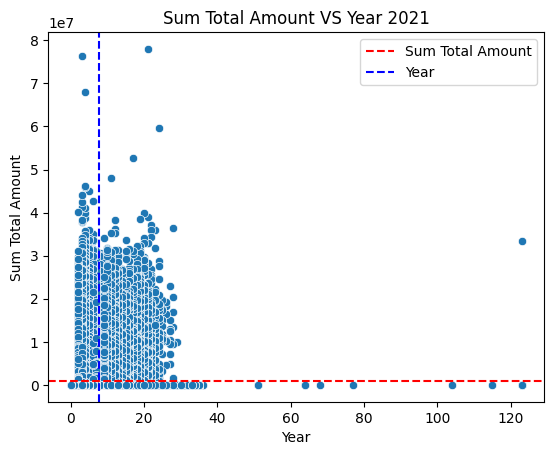

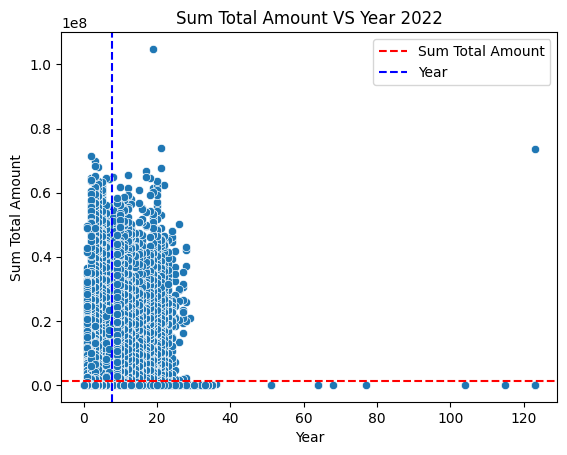

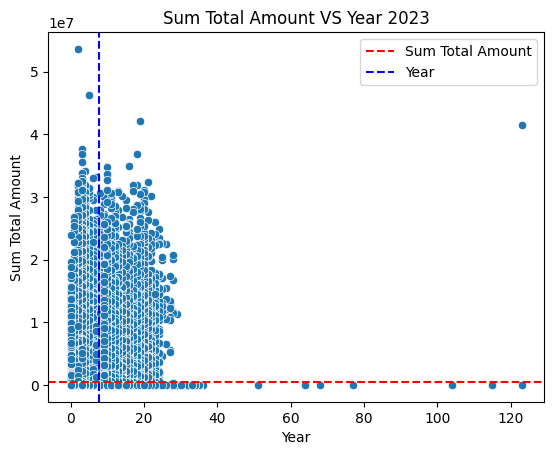

In [166]:
amountvsyr(mem_total_amt_yr2021, 2021)
amountvsyr(mem_total_amt_yr2022, 2022)
amountvsyr(mem_total_amt_yr2023, 2023)

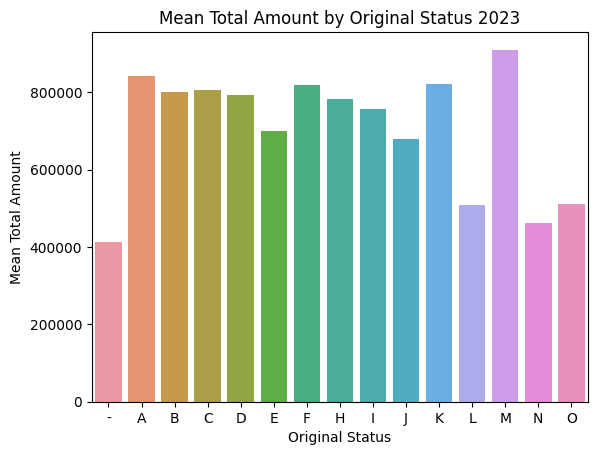

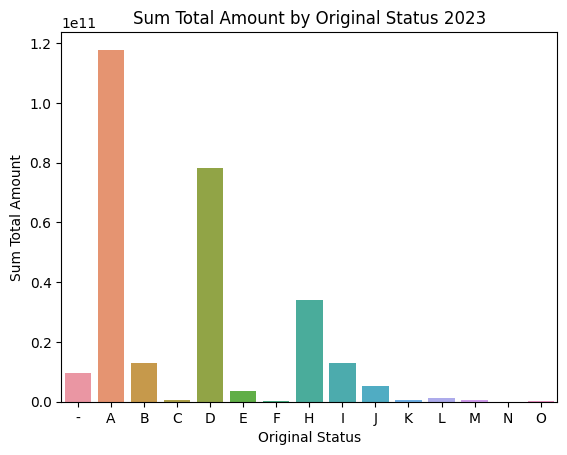

In [124]:
mean_amount_by_status = df_member_2023.groupby('original_status')['total_amount'].agg('mean').reset_index()
sns.barplot(x='original_status', y='total_amount', data=mean_amount_by_status)
plt.xlabel('Original Status')
plt.ylabel('Mean Total Amount')
plt.title('Mean Total Amount by Original Status 2023')
plt.show()

sum_amount_by_status = df_member_2023.groupby('original_status')['total_amount'].agg('sum').reset_index()
sns.barplot(x='original_status', y='total_amount', data=sum_amount_by_status)
plt.xlabel('Original Status')
plt.ylabel('Sum Total Amount')
plt.title('Sum Total Amount by Original Status 2023')
plt.show()

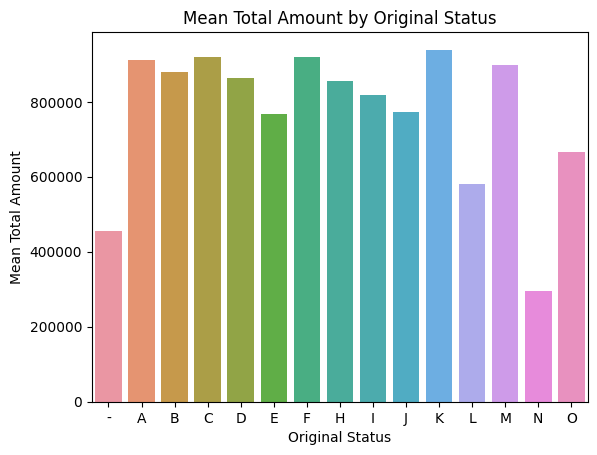

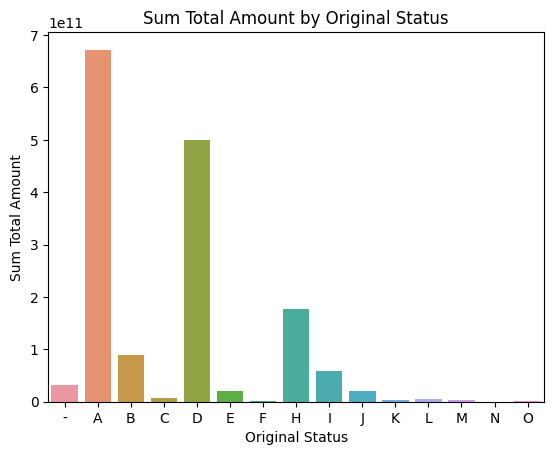

In [125]:
# df_member_join.groupby('original_status')['total_amount'].agg('mean').reset_index()
mean_amount_by_status = df_member_join.groupby('original_status')['total_amount'].agg('mean').reset_index()

sns.barplot(x='original_status', y='total_amount', data=mean_amount_by_status)
plt.xlabel('Original Status')
plt.ylabel('Mean Total Amount')
plt.title('Mean Total Amount by Original Status')
plt.show()

sum_amount_by_status = df_member_join.groupby('original_status')['total_amount'].agg('sum').reset_index()
sns.barplot(x='original_status', y='total_amount', data=sum_amount_by_status)
plt.xlabel('Original Status')
plt.ylabel('Sum Total Amount')
plt.title('Sum Total Amount by Original Status')
plt.show()

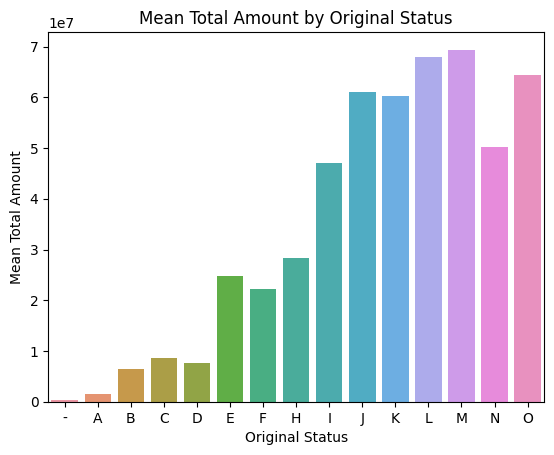

In [126]:
mean_amount_by_status = df_member_join.groupby(['original_status', 'ent'])['total_amount'].agg('sum').reset_index().groupby('original_status')['total_amount'].agg('mean').reset_index()
# mean_amount_by_status = df_member_join.groupby('original_status')['total_amount'].agg('mean').reset_index()

sns.barplot(x='original_status', y='total_amount', data=mean_amount_by_status)
plt.xlabel('Original Status')
plt.ylabel('Mean Total Amount')
plt.title('Mean Total Amount by Original Status')
plt.show()

In [173]:
mean_amount_by_status.head(3)

,original_status,total_amount
0,-,117822.746020
1,A,280829.324854
2,B,945494.402443


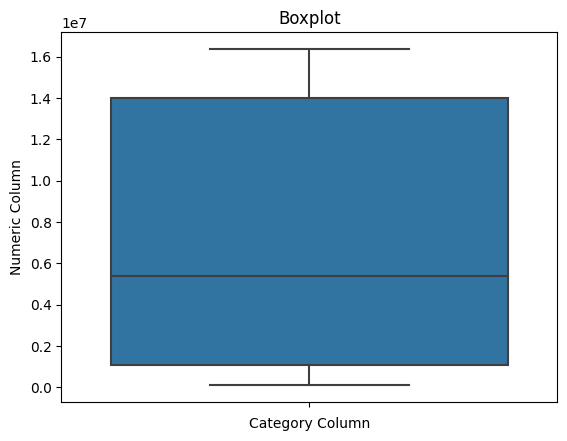

In [174]:
sns.boxplot(y='total_amount', data=mean_amount_by_status)

# Add labels and title
plt.xlabel('Category Column')
plt.ylabel('Numeric Column')
plt.title('Boxplot')

# Show the plot
plt.show()

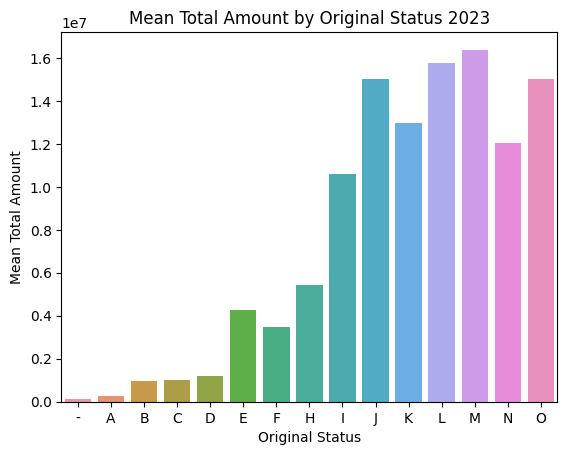

In [127]:
mean_amount_by_status = df_member_2023.groupby(['original_status', 'ent'])['total_amount'].agg('sum').reset_index().groupby('original_status')['total_amount'].agg('mean').reset_index()
# mean_amount_by_status = df_member_join.groupby('original_status')['total_amount'].agg('mean').reset_index()

sns.barplot(x='original_status', y='total_amount', data=mean_amount_by_status)
plt.xlabel('Original Status')
plt.ylabel('Mean Total Amount')
plt.title('Mean Total Amount by Original Status 2023')
plt.show()